# **UTS - Linear Regression**

## **Data Profiling (Real Estate Prediction)**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

Mengimpor seluruh library yang dibutuhkan, seperti pandas, numpy, matplotlib, seaborn, serta modul dari scikit-learn untuk regresi dan preprocessing data.

In [2]:
# Load dataset Used Cars Price Prediction

!wget https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv

--2025-10-07 08:54:18--  https://raw.githubusercontent.com/FarrelllAdityaaa/dataset-uts-datamining/refs/heads/main/used_cars_price_fiks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 602640 (589K) [text/plain]
Saving to: ‘used_cars_price_fiks.csv’

used_cars_price_fik 100%[===================>] 588.52K  --.-KB/s    in 0.04s   

2025-10-07 08:54:18 (15.0 MB/s) - ‘used_cars_price_fiks.csv’ saved [602640/602640]



Mengunduh dataset Used Cars Price Prediction langsung dari GitHub menggunakan perintah wget.

In [3]:
# Menyimpan ke dalam variabel dataset
df = pd.read_csv('/content/used_cars_price_fiks.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


Membaca dataset CSV yang telah diunduh dan menyimpannya ke dalam variabel df. Lalu menampilkan isi awal dataframe.

In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  5719 non-null   float64
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   float64
 9   Engine             5983 non-null   float64
 10  Power              5876 non-null   float64
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


Menampilkan informasi umum dataset (df.info()), seperti jumlah baris, kolom, tipe data, dan jumlah nilai non-null.

In [5]:
# Menampilkan nilai statistika deskriptif setiap variabel dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.50,3009.00,4513.50,6018.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,5719.0,57545.592586,37988.496154,171.00,33923.00,53000.00,72998.00,775000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


Menampilkan statistik deskriptif (rata-rata, standar deviasi, min, max, kuartil) dari seluruh variabel numerik menggunakan df.describe().T.

## **EDA (Exploratory Data Analysis)**

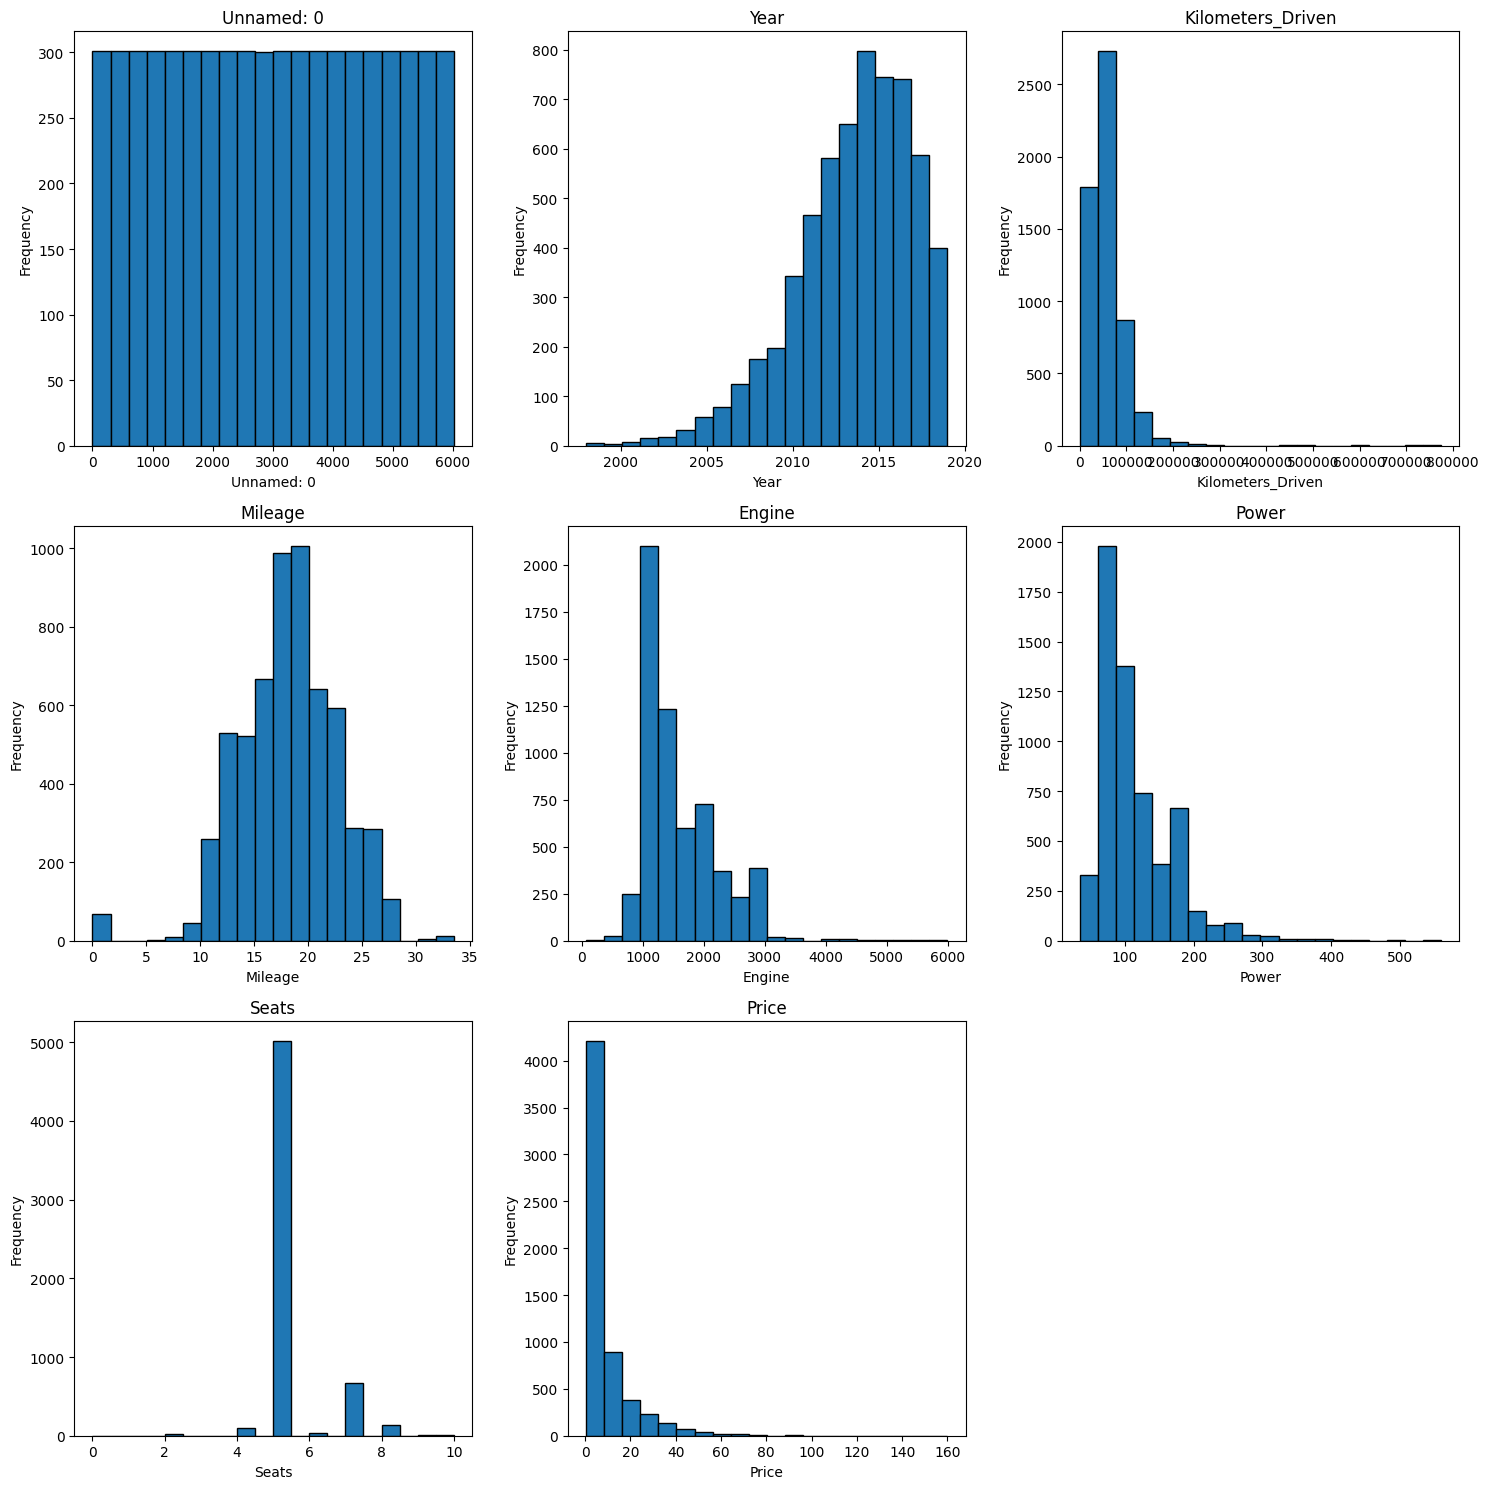

In [6]:
# Cek distribusi data numerik pada dataset dengan histogram
numeric_col = df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(numeric_col) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, col in enumerate(numeric_col):
    ax = axes[i]
    ax.hist(df[col], bins=20, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')


for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Membuat histogram untuk setiap kolom numerik, guna melihat distribusi data dan mendeteksi kemungkinan outlier atau data yang tidak normal.

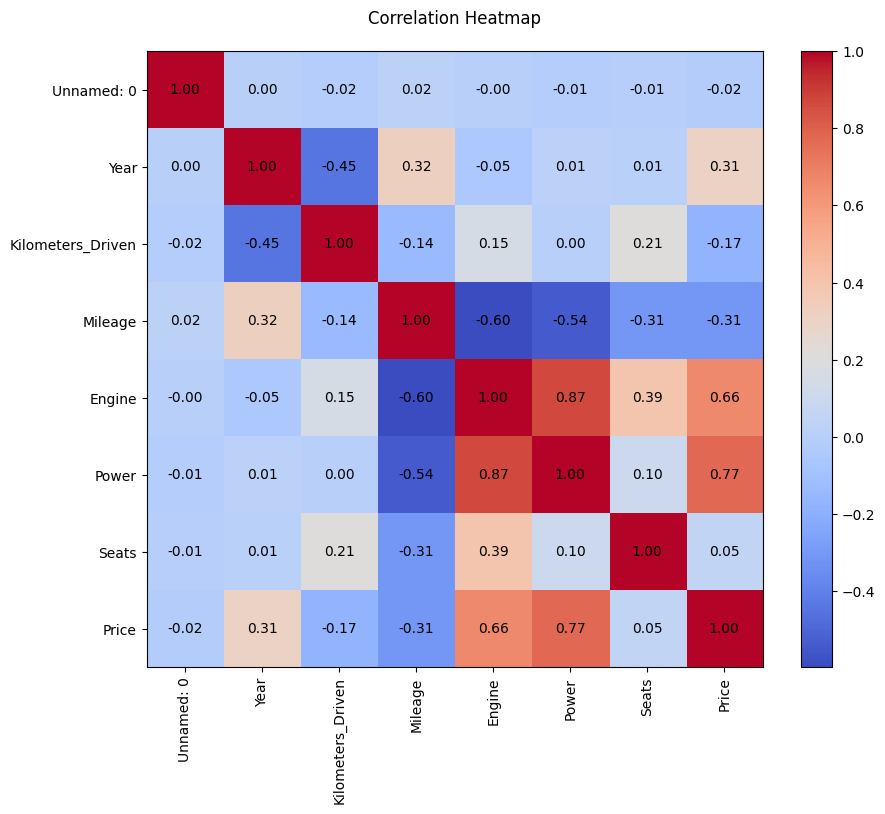

In [7]:
# Cek korelasi antar data numerik dengan heatmap
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Label sumbu
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

plt.title("Correlation Heatmap", pad=20)
plt.show()

Membuat correlation heatmap antar variabel numerik untuk melihat hubungan linear antara fitur dengan target atau antar fitur lainnya.

## **Data Cleaning**

### **Remove Null Value**

In [8]:
# Buat salinan data untuk preprocessing
df_clean = df.copy()

Membuat salinan dataset (df_clean) untuk proses pembersihan tanpa mengubah data asli.

In [9]:
# Cek nilai Null pada dataset
df_clean.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,300
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36


Memeriksa jumlah missing value di setiap kolom.

**Karena datanya terlalu banyak buat dihapus, jadi saya isi aja**

In [10]:
# Isi nilai kosong di kolom numerik dengan nilai rata-rata kolomnya
cols_with_missing = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

# Hapus baris yang memiliki nilai Null
df_clean = df_clean.dropna()

Mengisi nilai kosong pada beberapa kolom numerik (Kilometers_Driven, Mileage, Engine, Power, Seats) dengan rata-rata kolom masing-masing.

In [11]:
# Cek dataset setelah diisi nilainya
df_clean.isnull().sum()

,0
Unnamed: 0,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


Memastikan bahwa semua nilai kosong sudah terisi (mengecek ulang isnull().sum()).

### **Remove Duplicate Value**

In [12]:
# Cek duplikasi dataset
df_clean.duplicated().sum()

np.int64(0)

Memeriksa apakah terdapat data duplikat di dataset.

**Karena dataset Real Estate Prediction tidak memiliki duplikasi data, langsung saja ke tahap berikutnya**

### **Remove Column ID**

In [13]:
# Menghapus kolom ID atau kolom yang tidak memiliki nilai untuk model
df_clean.drop(['Unnamed: 0'], axis=1, inplace=True)

df_clean.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

Menghapus kolom yang tidak relevan atau menjadi ID (Unnamed: 0) untuk menyederhanakan dataset.

### **Remove Outliers**

In [14]:
# Buat salinan data untuk menghapus outliers
df_outlier = df_clean.copy()

Membuat salinan dataset (df_outlier) untuk proses deteksi dan penghapusan outlier.

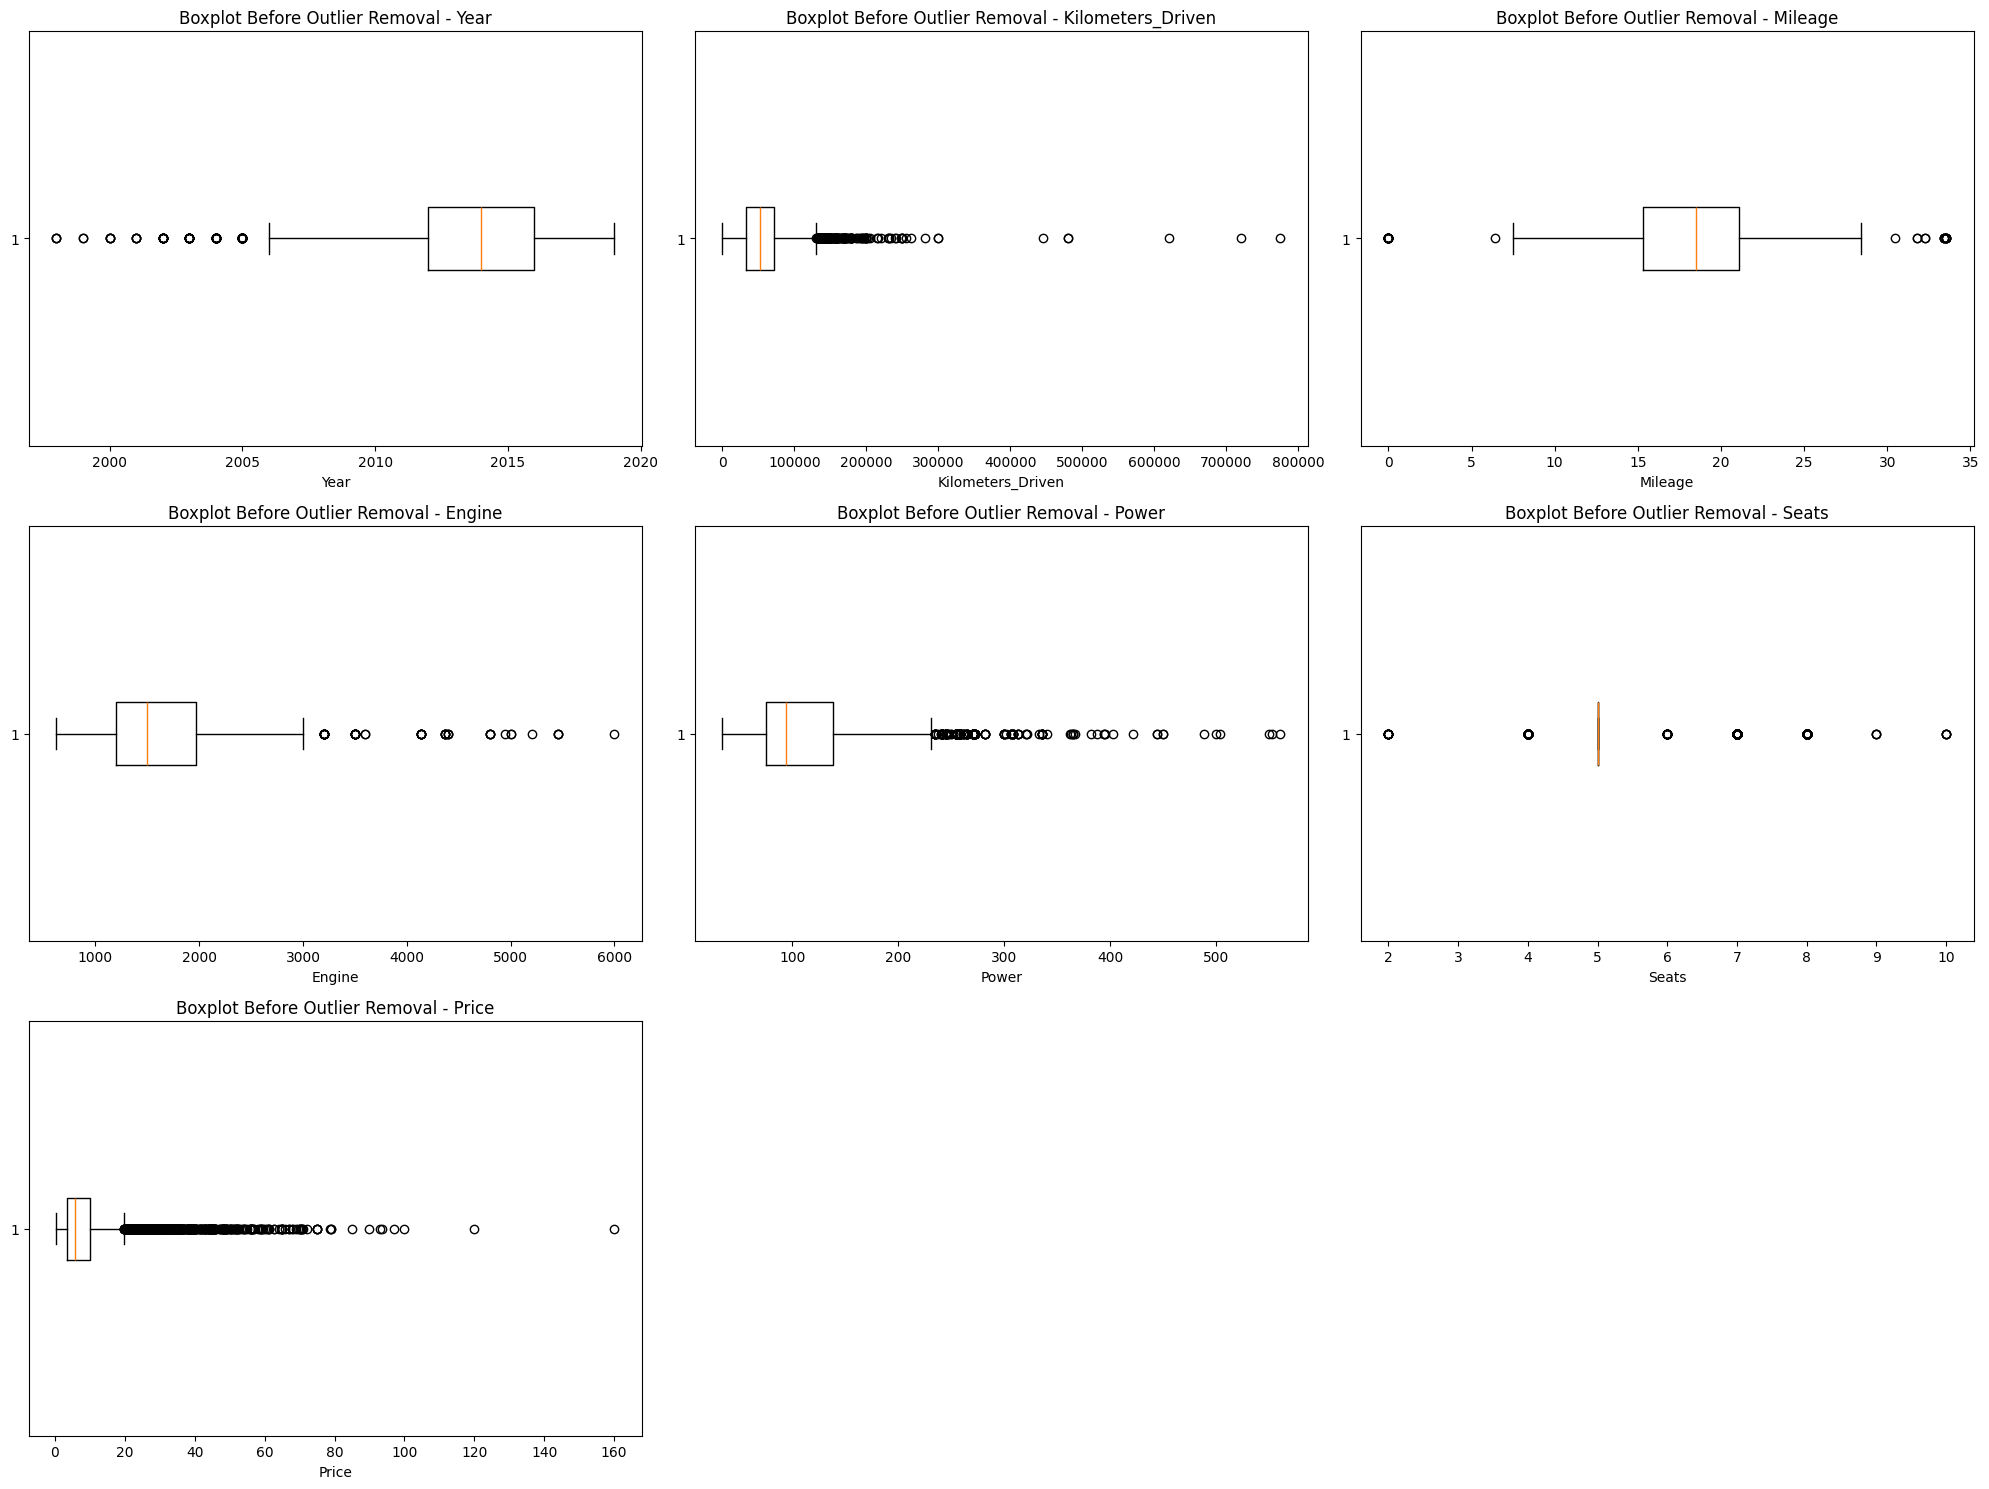

In [15]:
# Cek boxplot sebelum diatasi outliernya
num_cols = df_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Menampilkan boxplot dari setiap kolom numerik untuk melihat keberadaan outlier sebelum dilakukan penanganan.

In [16]:
# Fungsi untuk mendeteksi outlier dengan IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier = df[(df < lower_bound) | (df > upper_bound)]
    return df_outlier

# Hitung jumlah outlier tiap kolom dan simpan dalam dictionary
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df_outlier[col])
    outlier_counts[col] = len(outliers)

# Buat DataFrame dari dictionary
outlier_summary_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Tampilkan hasilnya
print("Jumlah outlier per kolom (IQR method):")
display(outlier_summary_df)

Jumlah outlier per kolom (IQR method):


,Outlier Count
Year,103
Kilometers_Driven,184
Mileage,42
Engine,54
Power,223
Seats,893
Price,671


Mendefinisikan fungsi deteksi outlier menggunakan metode Interquartile Range (IQR).

In [17]:
# Hapus outlier dari semua kolom numerik
def remove_outliers_iqr(df, columns):
  df_no_outlier = df.copy()

  Q1 = df_no_outlier[columns].quantile(0.25)
  Q3 = df_no_outlier[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier_filters = ~((df_no_outlier[columns] < lower) | (df_no_outlier[columns] > upper)).any(axis=1)
  df_no_outlier = df_no_outlier[outlier_filters]
  return df_no_outlier

df_no_outlier = remove_outliers_iqr(df_outlier, num_cols)

print("Jumlah data sebelum hapus outlier: ", len(df_outlier))
print("Jumlah data setelah hapus outlier: ", len(df_no_outlier))
print("Total data yang dihapus: ", len(df_outlier) - len(df_no_outlier))
print("Persentase data yang dihapus: ", round((len(df_outlier) - len(df_no_outlier)) / len(df_outlier) * 100, 2), "%")

Jumlah data sebelum hapus outlier:  5582
Jumlah data setelah hapus outlier:  3976
Total data yang dihapus:  1606
Persentase data yang dihapus:  28.77 %


Mendefinisikan fungsi penghapusan outlier dari seluruh kolom numerik berdasarkan IQR (menghapus data di luar batas bawah dan atas).

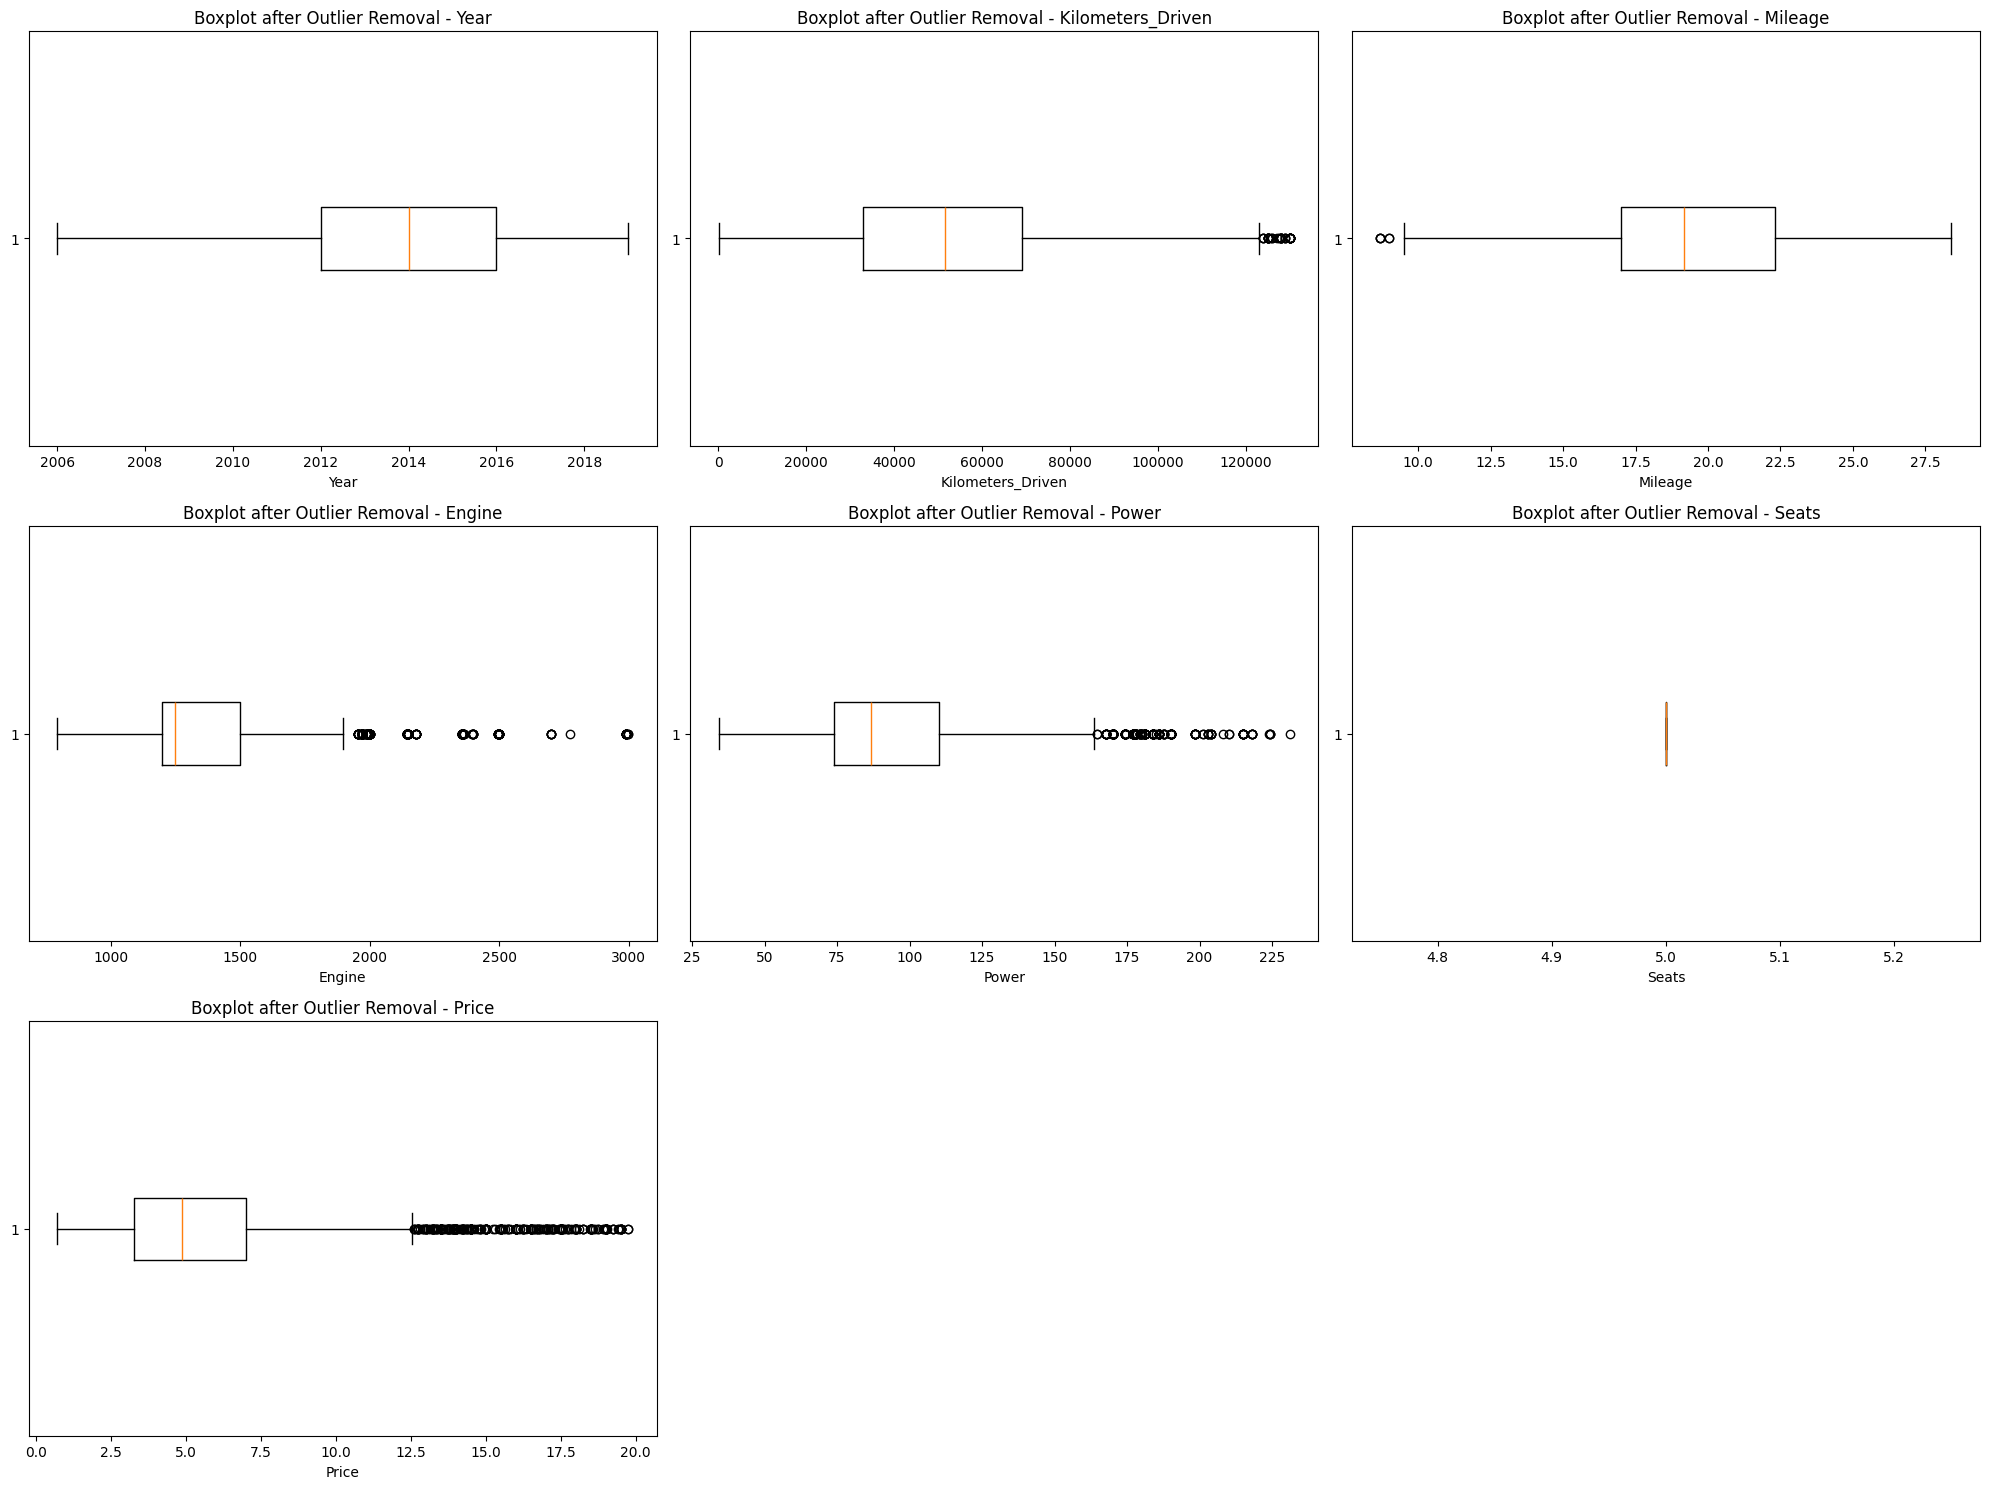

In [18]:
# Cek boxplot setelah diatasi outliernya
num_cols = df_no_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_no_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot after Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Menampilkan boxplot baru setelah outlier dihapus untuk memastikan hasilnya lebih bersih.

## **Feature Selection**

### **Variance Threshold (Filter Method)**

In [19]:
# Ambil hanya kolom numerik
df_numeric = df_clean.select_dtypes(include=['int64', 'float64'])

var_thr_re = VarianceThreshold(threshold=0.1)
var_thr_re.fit_transform(df_numeric)

# Cek hasilnya
print("Features with variance > 0.1:", var_thr_re.get_support(), '\n')

# Cek hasilnya dengan kolomnya
print("Columns with variance > 0.1:", df_numeric.columns[var_thr_re.get_support()])


Features with variance > 0.1: [ True  True  True  True  True  True  True] 

Columns with variance > 0.1: Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')


Melakukan feature selection dengan metode Variance Threshold, yaitu menghapus fitur dengan variansi terlalu kecil (threshold = 0.1).

*True = high variance*

*False = low variance*

In [20]:
# Cek perbandingan jumlah keduanya
print("Total features:", len(var_thr_re.get_support()))
print("Features with variance > 0.1:", len(df_numeric.columns[var_thr_re.get_support()]))

Total features: 7
Features with variance > 0.1: 7


Menampilkan jumlah total fitur dan fitur yang lolos seleksi berdasarkan threshold variansi.

**Menampilkan fitur/kolom dengan low variance**

In [21]:
# Menggunakan list comprehension untuk mendapatkan kolom-kolom low variance
low_var_re = [column for column in df_numeric.columns
              if column not in df_numeric.columns[var_thr_re.get_support()]]

# Tampilkan menggunakan for loop
print("Low variance features:")
for features in low_var_re:
  print(features)

Low variance features:


Menampilkan daftar kolom yang termasuk low variance features (fitur dengan variasi rendah).

**Karena tidak ada nilai low variance, maka lanjut saja**

In [22]:
# Cek dataset setelah seleksi fitur menggunakan Variance Threshold
df_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Menampilkan cuplikan data (head()) setelah dilakukan seleksi fitur berdasarkan Variance Threshold.

In [23]:
# Simpan dataset final
df_final = df_clean.copy()
df_final

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


Menyimpan dataset hasil akhir preprocessing ke dalam variabel df_final.

In [24]:
# Menampilkan nilai statistika deskriptif setiap variabel dataset
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5582.0,2013.480831,3.166113,1998.00,2012.0,2014.00,2016.00,2019.00
Kilometers_Driven,5582.0,57108.882121,37876.260778,171.00,33312.0,52465.50,72031.75,775000.00
Mileage,5582.0,18.318047,4.369031,0.00,15.3,18.49,21.10,33.54
Engine,5582.0,1621.664815,601.183535,624.00,1198.0,1494.00,1968.00,5998.00
Power,5582.0,112.901754,53.765286,34.20,75.0,94.00,138.10,560.00
Seats,5582.0,5.279470,0.799797,2.00,5.0,5.00,5.00,10.00
Price,5582.0,9.566693,11.202026,0.44,3.5,5.70,10.00,160.00


Menampilkan kembali statistik deskriptif dataset final setelah pembersihan dan transformasi.

## **Modelling**

### **Feature Scaling**

In [25]:
# Menggunakan z-score atau standard scaler
scaler = StandardScaler()

# Pisahkan kolom prediktor dengan kolom target
X = df_final.drop('Price', axis=1)
y = df_final['Price']

# Encode kolom kategorik (karena masih ada data string)
categorical_cols = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
le = LabelEncoder()

for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scaling
X = scaler.fit_transform(X)

# Cek hasil scaling
print(X)

[[ 0.51510329  1.15269996 -1.09950068 ... -1.03748797 -1.01825289
  -0.34945714]
 [-0.75754803  1.49140456  0.47986443 ... -0.06598379  0.24736105
  -0.34945714]
 [-0.80998691 -1.2182322  -0.78362766 ... -0.70311753 -0.4501775
  -0.34945714]
 ...
 [ 0.00684952  0.13658618 -0.46775464 ...  1.45781386 -0.01677355
   3.40183085]
 [ 0.52720457  0.81399537 -0.15188162 ... -1.03748797 -0.8519597
  -0.34945714]
 [-1.41101717 -0.20211842 -0.78362766 ... -1.14062712 -1.02866947
  -0.34945714]]


Melakukan standardisasi data menggunakan StandardScaler.
Pisahkan fitur prediktor (X) dan target (y), serta lakukan encoding pada kolom kategorikal.

In [26]:
# Split dataset ke data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Cek data masing-masing
print("Jumlah data latih:", X_train.shape)
print("Jumlah data uji:", X_test.shape)

Jumlah data latih: (4465, 11)
Jumlah data uji: (1117, 11)


Melakukan pembagian dataset menjadi data latih dan data uji (80:20) menggunakan train_test_split.

In [27]:
# Modelling dengan model Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

Membangun model Linear Regression dan melatihnya menggunakan data latih.

**Rumus Coefficient:**

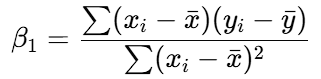

Keterangan:


*   β₁ = Coefficient atau Kemiringan regresi, yang menunjukkan perubahan rata-rata pada Y untuk setiap satu unit perubahan pada X
*   xi = Data x (prediktor) ke-i
*   x̄ = Rata-rata data x
*   yi = Data y (target) ke-i
*   ȳ = Rata-rata data y





**Rumus Intercept:**

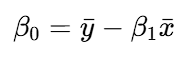

Keterangan:



*    β₀ = Intercept atau konstanta titik potong garis regresi dengan sumbu Y (nilai Y saat X = 0)
*   ȳ = Rata-rata data y
*   β₁ = Coefficient atau Kemiringan regresi, yang menunjukkan perubahan rata-rata pada Y untuk setiap satu unit perubahan pada X
*   x̄ = Rata-rata data x




In [28]:
# Cek parameter model
print("Intercept:", model_lr.intercept_)
print("Coefficient:", model_lr.coef_)

Intercept: 9.533339409112763
Coefficient: [ 0.12766108 -0.65368016  2.93206672 -0.81719394 -1.62301619 -1.139993
 -0.03622845 -1.02603443  0.14440918  6.70959212 -0.75062554]


Menampilkan parameter model yaitu intercept dan koefisien regresi untuk masing-masing fitur.

### **Model Evaluation**

In [29]:
# Evaluasi model dengan metrik evaluasi regresi (R2, MAE, MSE, RMSE)
# y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# Membuat dataframe untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Mengurutkan index
comparison_df = comparison_df.sort_index()
# Mereset index
comparison_df = comparison_df.reset_index(drop=True)
# Tampilkan hasil
comparison_df

,Actual,Predicted
0,9.95,9.886784
1,28.00,21.952659
2,4.25,5.930675
3,7.75,10.365179
4,4.85,7.095929
...,...,...
1112,2.27,-3.434941
1113,4.00,8.665124
1114,3.25,4.241338
1115,2.75,3.215011


Memprediksi harga mobil pada data uji dan membuat dataframe untuk membandingkan nilai aktual dan prediksi.

In [30]:
# Hitung metrik evaluasi
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)

# Membuat dataframe nilai evaluasi
score = pd.DataFrame({
    'Metrik': ['R2', 'MAE', 'MSE', 'RMSE'],
    'Nilai': [r2_test, mae_test, mse_test, rmse_test]
})

score

,Metrik,Nilai
0,R2,0.726026
1,MAE,3.642943
2,MSE,34.686891
3,RMSE,5.889558


Menghitung metrik evaluasi regresi:


*   R² (koefisien determinasi)
*   MAE (Mean Absolute Error)
*   MSE (Mean Squared Error)
*   RMSE (Root Mean Squared Error)
Kemudian menampilkannya dalam bentuk tabel.

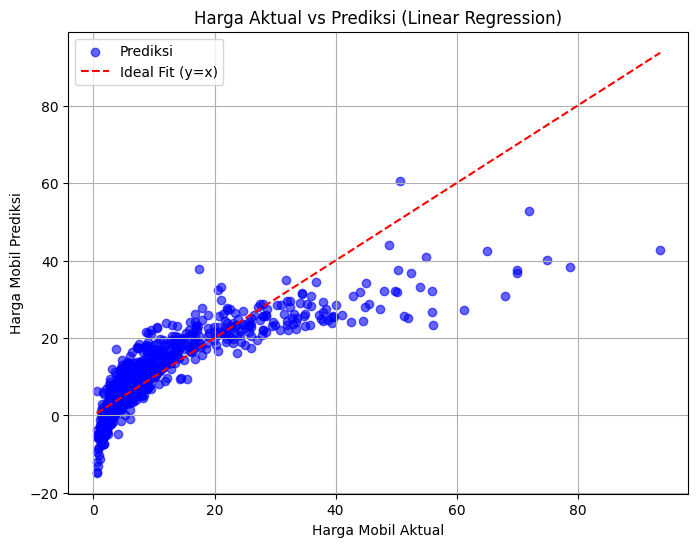

In [31]:
# Scatter plot untuk hasil prediksi regresi linear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label='Prediksi')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.xlabel('Harga Mobil Aktual')
plt.ylabel('Harga Mobil Prediksi')
plt.title('Harga Aktual vs Prediksi (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

Membuat scatter plot antara nilai aktual dan prediksi untuk memvisualisasikan seberapa baik model regresi memprediksi data.